In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'1.12.1'

In [3]:
torch.cuda.is_available()

False

In [4]:
A = torch.FloatTensor([[1,2,3],[4,5,6]])
A.sum(axis=1)

tensor([ 6., 15.])

In [7]:
i = torch.LongTensor([[0,1,1], [2,0,2]])
v = torch.FloatTensor([3,4,5])
torch.sparse.FloatTensor(i, v, torch.Size([2,3])).to_dense()

tensor([[0., 0., 3.],
        [4., 0., 5.]])

In [11]:
x = torch.tensor(4.0, requires_grad=True)
y = x ** 2

print(y)
print(y.grad_fn)

y.backward()

print(x.grad)

tensor(16., grad_fn=<PowBackward0>)
tensor(8.)


In [15]:
x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(2.0)

z = x * y

for i, name in zip([x, y, z], 'xyz'):
    print(f'{name}\ndata: {i.data}\nrequires_grad: {i.requires_grad}\n' + 'grad: {i.grad}\ngrad_fn: {i.grad_fn}\nis_leaf: {i.is_leaf}\n')

x
data: 1.0
requires_grad: True
grad: {i.grad}
grad_fn: {i.grad_fn}
is_leaf: {i.is_leaf}

y
data: 2.0
requires_grad: False
grad: {i.grad}
grad_fn: {i.grad_fn}
is_leaf: {i.is_leaf}

z
data: 2.0
requires_grad: True
grad: {i.grad}
grad_fn: {i.grad_fn}
is_leaf: {i.is_leaf}



In [17]:
x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

print('z grad function:', z.grad_fn)
print('loss grad function:', loss.grad_fn)

z grad function: <AddBackward0 object at 0x7fab68c94b80>
loss grad function: <BinaryCrossEntropyWithLogitsBackward0 object at 0x7fab674cf880>


In [23]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.3263, 0.2932, 0.3293],
        [0.3263, 0.2932, 0.3293],
        [0.3263, 0.2932, 0.3293],
        [0.3263, 0.2932, 0.3293],
        [0.3263, 0.2932, 0.3293]])
tensor([0.3263, 0.2932, 0.3293])


In [31]:
x = torch.tensor(5.0, requires_grad=True)
y = x ** 3

y.backward(retain_graph=True)
print(x.grad)
y.backward(retain_graph=True)
print(x.grad)
y.backward(retain_graph=True)
print(x.grad)

tensor(75.)
tensor(150.)
tensor(225.)


In [35]:
x = torch.tensor(5.0, requires_grad=True)
y = x ** 3

y.backward(retain_graph=True)
print(x.grad)
x.grad.zero_()
y.backward(retain_graph=True)
print(x.grad)
x.grad.zero_()
y.backward(retain_graph=True)
print(x.grad)

tensor(75.)
tensor(75.)
tensor(75.)


In [38]:
def func(x):
    return x ** 2

def dfunc(x):
    x = torch.tensor(float(x), requires_grad=True)
    y = x ** 2
    y.backward()
    return x.grad

def GD(x_start, df, epochs, lr):
    xs = np.zeros(epochs + 1)
    x = x_start
    xs[0] = x
    for i in range(epochs):
        dx = df(x)
        x += - dx * lr
        xs[i + 1] = x
    return xs

[5.   2.   0.8  0.32 0.13 0.05 0.02 0.01 0.   0.   0.   0.   0.   0.
 0.   0.  ]


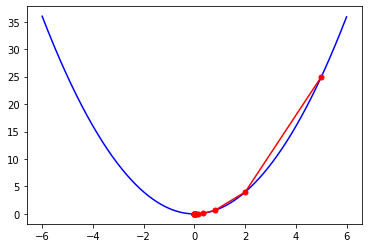

In [40]:
x_start = 5
epochs = 15
lr = 0.3
w = GD(x_start, dfunc, epochs, lr)
print(np.around(w, 2))

t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(w, func(w), c='r', marker='o', markersize=5)
plt.show()

In [45]:
def func(x):
    return 2*x**4 - 3*x**2 + 2*x - 20

def dfunc(x):
    x = torch.tensor(float(x), requires_grad=True)
    y = 2*x**4 - 3*x**2 + 2*x - 20
    y.backward()
    return x.grad

[5.   4.03 3.53 ... 0.51 0.51 0.51]


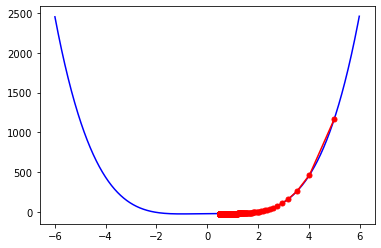

In [46]:
x_start = 5
epochs = 15000
lr = 0.001
w = GD(x_start, dfunc, epochs, lr)
print(np.around(w, 2))

t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(w, func(w), c='r', marker='o', markersize=5)
plt.show()

In [6]:
def train(X, y, epochs=100, lr=0.0001):
    loss_list, w_list, b_list = [], [], []
    w = torch.randn(1, requires_grad=True, dtype=torch.float)
    b = torch.randn(1, requires_grad=True, dtype=torch.float)
    for epoch in range(epochs):
        y_pred = w * X + b
        MSE = torch.mean(torch.square(y_pred - y))
        MSE.backward()
        
        with torch.no_grad():
            w -= lr * w.grad
            b -= lr * b.grad
            w_list.append(w.item())
            b_list.append(b.item())
            loss_list.append(MSE.item())
            
            w.grad.zero_()
            b.grad.zero_()
            
    return w_list, b_list, loss_list

In [4]:
n = 100
X = np.linspace(0, 50, n)
y = np.linspace(0, 50, n)

X += np.random.uniform(-10, 10, n)
y += np.random.uniform(-10, 10, n)

In [7]:
w_list, b_list, loss_list = train(torch.tensor(X), torch.tensor(y))
print(f'w={w_list[-1]}, b={b_list[-1]}')

w=0.9481971859931946, b=-1.2882739305496216


C:\Users\Admin\Anaconda3\envs\pytorch\lib\site-packages\torch\autograd\__init__.py:132: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 8000). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag


In [8]:
w_list, b_list, loss_list = train(torch.tensor(X), torch.tensor(y), epochs=100000)
print(f'w={w_list[-1]}, b={b_list[-1]}')

w=0.8297072052955627, b=2.882154703140259


In [9]:
coef = np.polyfit(X, y, deg=1)
print(f'w={coef[0]}, b={coef[1]}')

w=0.8294092046090223, b=2.8926404625332602


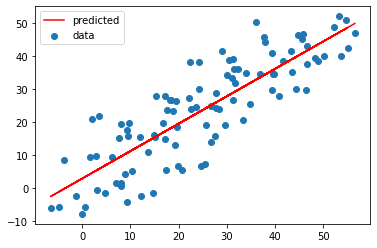

In [10]:
plt.scatter(X, y, label='data')
plt.plot(X, w_list[-1] * X + b_list[-1], 'r-', label='predicted')
plt.legend()